# TITANIC TEST

In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm

from matplotlib import pyplot as plt 
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(9, 5)})

from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [2]:
raw_df = sns.load_dataset('titanic')
df=raw_df
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


# DATA CHECK

In [3]:
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


(891, 15)

In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# NaN TREATMENT

In [5]:
from sklearn.impute import IterativeImputer

# Creazione dell'istanza dell'imputatore
imputer = IterativeImputer()
# Seleziona solo le colonne numeriche
numerical_columns = df.select_dtypes(include=[float, int]).columns
# Sostituzione dei valori mancanti nel DataFrame
imputed_values = imputer.fit_transform(df[numerical_columns])
df[numerical_columns] = imputed_values


df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0.0,3.0,male,22.000000,1.0,0.0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1.0,1.0,female,38.000000,1.0,0.0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1.0,3.0,female,26.000000,0.0,0.0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1.0,1.0,female,35.000000,1.0,0.0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0.0,3.0,male,35.000000,0.0,0.0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,male,27.000000,0.0,0.0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1.0,1.0,female,19.000000,0.0,0.0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0.0,3.0,female,23.259681,1.0,2.0,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1.0,1.0,male,26.000000,0.0,0.0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [6]:
# Check iterative imputer for age column
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
# change NaN values in deck column with "unknown"
df['deck'] = df['deck'].cat.add_categories(['unknown'])
df['deck'].fillna(value='unknown', inplace=True)

In [8]:
# Droping NaN values in embarked and embark_town columns
df.dropna(subset=['embarked',"embark_town"], inplace=True)

In [9]:
# Check all NaN
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

# ASSIGN THE CORRECT DATA TYPE

In [10]:
df_float=["survived","pclass","age","sibsp","parch"]
for el in df_float:
    df[el]=df[el].astype('int64')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          889 non-null    int64   
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  deck         889 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        889 non-null    object  
 14  alone        889 non-null    bool    
dtypes: bool(2), category(2), float64(1), int64(5), object(5)
memory usage: 87.3+ KB


In [12]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,unknown,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,unknown,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,unknown,Southampton,no,True
5,0,3,male,29,0,0,8.4583,Q,Third,man,True,unknown,Queenstown,no,True
6,0,1,male,54,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2,3,1,21.0750,S,Third,child,False,unknown,Southampton,no,False
8,1,3,female,27,0,2,11.1333,S,Third,woman,False,unknown,Southampton,yes,False
9,1,2,female,14,1,0,30.0708,C,Second,child,False,unknown,Cherbourg,yes,False


# DUMMY VARIABLES

In [13]:
# Creating dummy variables for interesting columns
df_dummy=df[["sex","who","alive","class"]]
dummies = pd.get_dummies(df_dummy)

# New base df with dummy
df_dummied= pd.concat([df, dummies], axis=1)
df_dummied.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,sex_female,sex_male,who_child,who_man,who_woman,alive_no,alive_yes,class_First,class_Second,class_Third
0,0,3,male,22,1,0,7.2500,S,Third,man,...,0,1,0,1,0,1,0,0,0,1
1,1,1,female,38,1,0,71.2833,C,First,woman,...,1,0,0,0,1,0,1,1,0,0
2,1,3,female,26,0,0,7.9250,S,Third,woman,...,1,0,0,0,1,0,1,0,0,1
3,1,1,female,35,1,0,53.1000,S,First,woman,...,1,0,0,0,1,0,1,1,0,0
4,0,3,male,35,0,0,8.0500,S,Third,man,...,0,1,0,1,0,1,0,0,0,1


In [14]:
# In adult_male column, replace True and False with 1 and 0
df_dummied[['adult_male',"alone"]] = df_dummied[['adult_male',"alone"]].replace([True, False], [1, 0])


In [15]:
df_dummied.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'sex_female', 'sex_male', 'who_child', 'who_man',
       'who_woman', 'alive_no', 'alive_yes', 'class_First', 'class_Second',
       'class_Third'],
      dtype='object')

In [16]:
df_dummied.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   survived      889 non-null    int64   
 1   pclass        889 non-null    int64   
 2   sex           889 non-null    object  
 3   age           889 non-null    int64   
 4   sibsp         889 non-null    int64   
 5   parch         889 non-null    int64   
 6   fare          889 non-null    float64 
 7   embarked      889 non-null    object  
 8   class         889 non-null    category
 9   who           889 non-null    object  
 10  adult_male    889 non-null    int64   
 11  deck          889 non-null    category
 12  embark_town   889 non-null    object  
 13  alive         889 non-null    object  
 14  alone         889 non-null    int64   
 15  sex_female    889 non-null    uint8   
 16  sex_male      889 non-null    uint8   
 17  who_child     889 non-null    uint8   
 18  who_man   

C:\Users\Lavoro\AppData\Local\Temp\ipykernel_12704\399635850.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df_dummied.corr()


<AxesSubplot: >

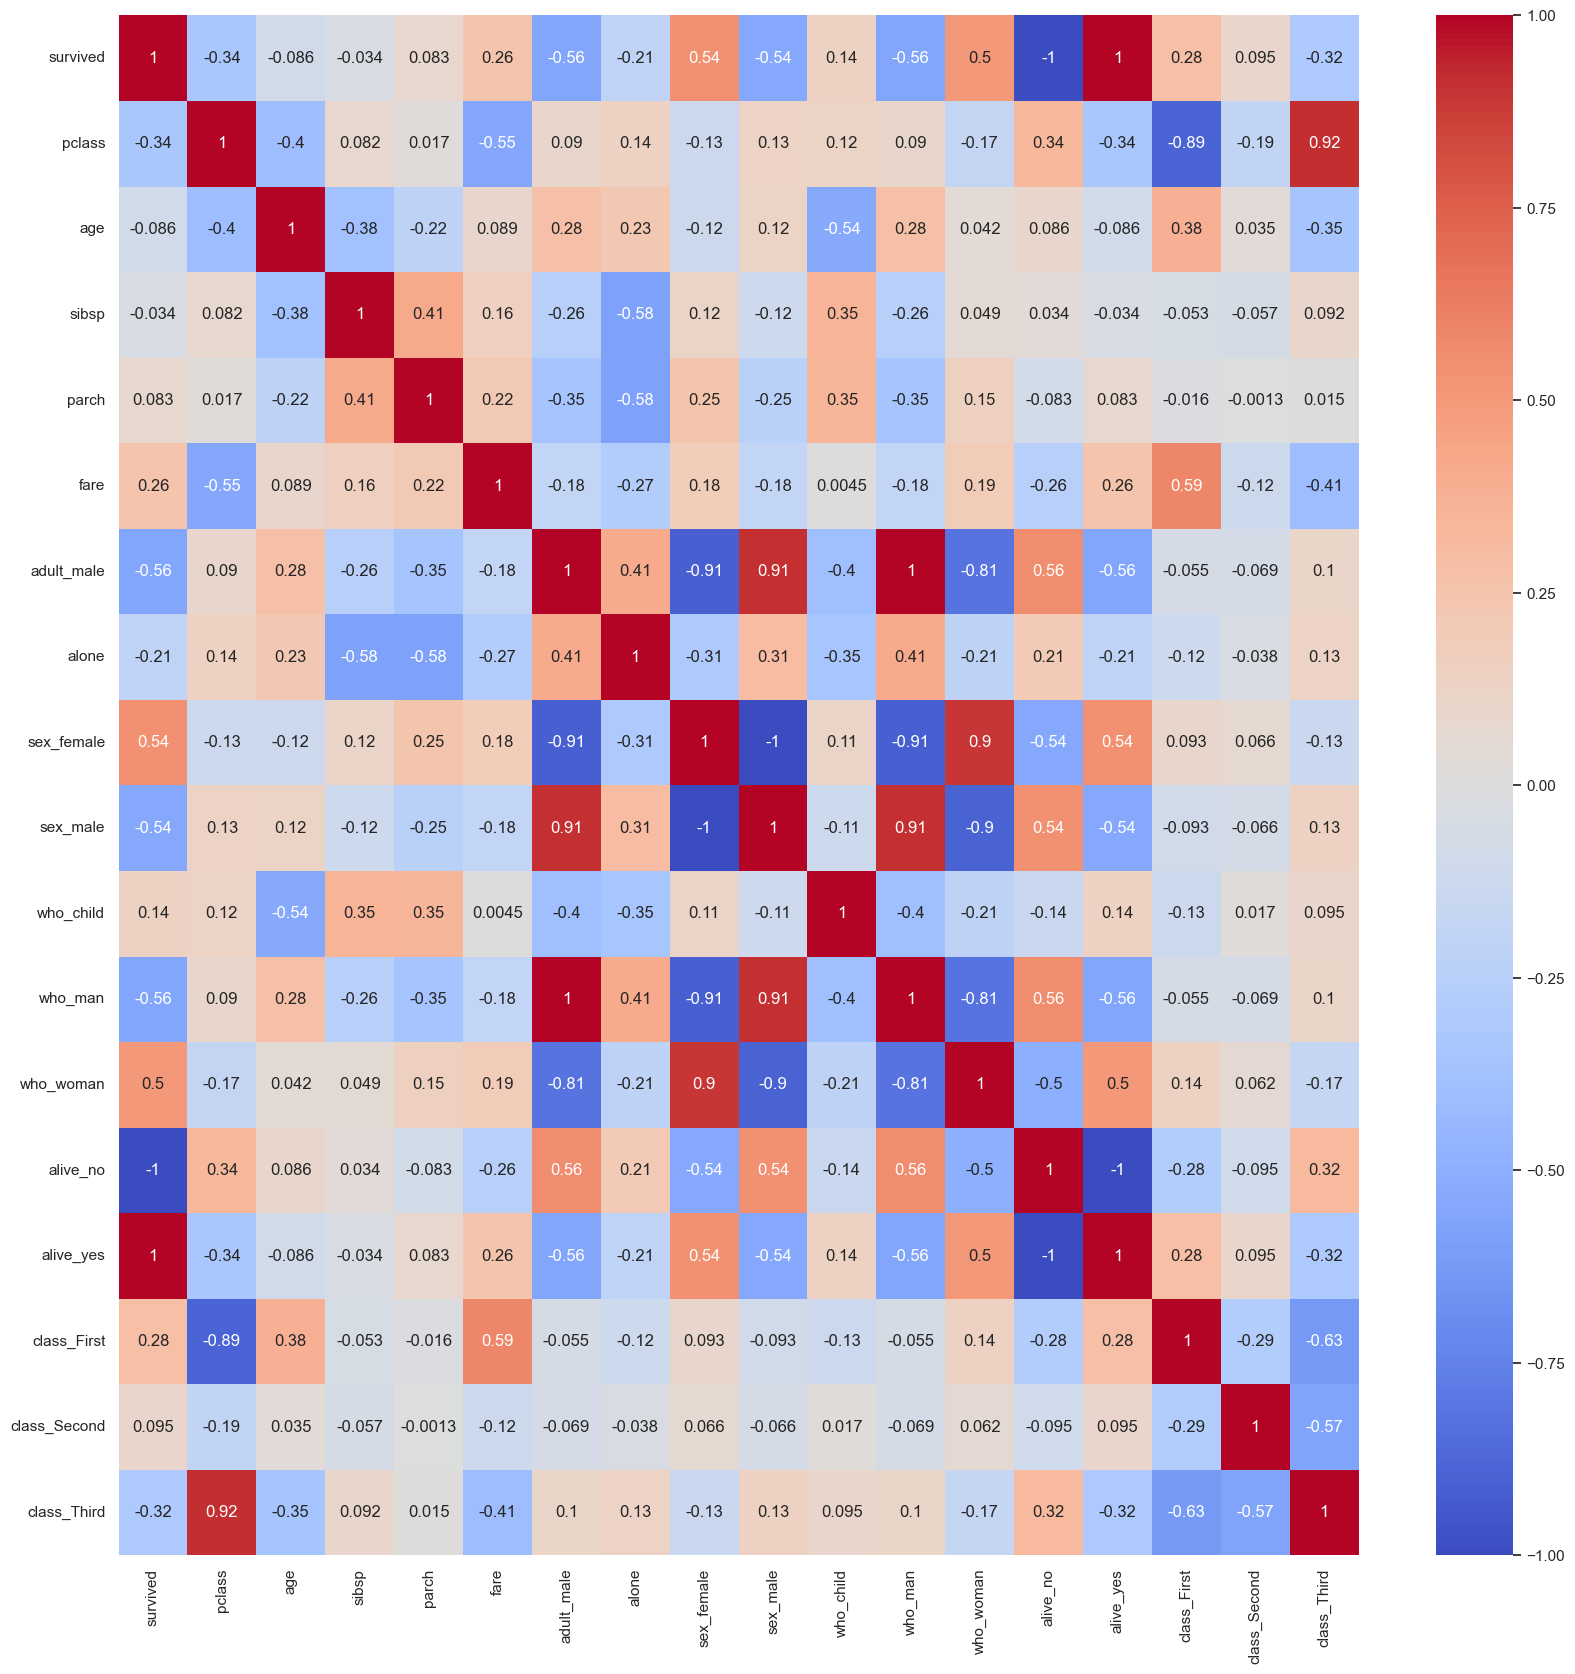

In [17]:
correlation=df_dummied.corr()
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data=correlation,annot=True,ax=ax,cmap="coolwarm")


In [18]:
correlation.sort_values(by='survived',ascending=False)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,who_child,who_man,who_woman,alive_no,alive_yes,class_First,class_Second,class_Third
survived,1.000000,-0.335549,-0.085999,-0.034040,0.083151,0.255290,-0.555520,-0.206207,0.541585,-0.541585,0.137284,-0.555520,0.504460,-1.000000,1.000000,0.282368,0.095002,-0.320171
alive_yes,1.000000,-0.335549,-0.085999,-0.034040,0.083151,0.255290,-0.555520,-0.206207,0.541585,-0.541585,0.137284,-0.555520,0.504460,-1.000000,1.000000,0.282368,0.095002,-0.320171
sex_female,0.541585,-0.127741,-0.123190,0.116348,0.247508,0.179958,-0.908250,-0.306985,1.000000,-1.000000,0.112364,-0.908250,0.895758,-0.541585,0.541585,0.093142,0.066459,-0.134227
who_woman,0.504460,-0.172640,0.041649,0.048824,0.152210,0.188650,-0.813572,-0.214510,0.895758,-0.895758,-0.211374,-0.813572,1.000000,-0.504460,0.504460,0.138873,0.062398,-0.170236
class_First,0.282368,-0.885250,0.376222,-0.052894,-0.015809,0.590576,-0.055235,-0.117091,0.093142,-0.093142,-0.126426,-0.055235,0.138873,-0.282368,0.282368,1.000000,-0.287653,-0.625395
fare,0.255290,-0.548193,0.089246,0.160887,0.217532,1.000000,-0.179851,-0.274079,0.179958,-0.179958,0.004452,-0.179851,0.188650,-0.255290,0.255290,0.590576,-0.117609,-0.411932
who_child,0.137284,0.121140,-0.537225,0.352224,0.351268,0.004452,-0.396358,-0.347112,0.112364,-0.112364,1.000000,-0.396358,-0.211374,-0.137284,0.137284,-0.126426,0.017379,0.094536
class_Second,0.095002,-0.190812,0.034889,-0.056507,-0.001278,-0.117609,-0.068951,-0.038178,0.066459,-0.066459,0.017379,-0.068951,0.062398,-0.095002,0.095002,-0.287653,1.000000,-0.567432
parch,0.083151,0.016824,-0.218044,0.414542,1.000000,0.217532,-0.351945,-0.583112,0.247508,-0.247508,0.351268,-0.351945,0.152210,-0.083151,0.083151,-0.015809,-0.001278,0.014634
sibsp,-0.034040,0.081656,-0.378656,1.000000,0.414542,0.160887,-0.255401,-0.584186,0.116348,-0.116348,0.352224,-0.255401,0.048824,0.034040,-0.034040,-0.052894,-0.056507,0.091515


<AxesSubplot: >

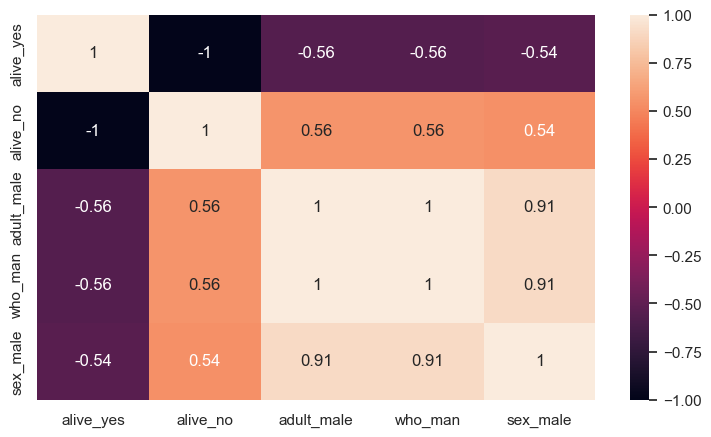

In [19]:
target_corr = correlation['survived'].abs().sort_values(ascending=False)
top_5 = target_corr[1:6]
selected_corr = correlation[top_5.index].loc[top_5.index]
sns.heatmap(data=selected_corr, annot=True)


# LINEAR REGRESSION MODEL

In [20]:
df_dummied.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'sex_female', 'sex_male', 'who_child', 'who_man',
       'who_woman', 'alive_no', 'alive_yes', 'class_First', 'class_Second',
       'class_Third'],
      dtype='object')

In [36]:
y = df_dummied['survived']
X = df_dummied[['class_First','sex_female','sex_male','age','alone','pclass','parch','sibsp','class_Third','class_Second']]

In [37]:

# Dividi il dataset in train e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea un'istanza del modello di regressione logistica
logreg = LogisticRegression(max_iter=20000)

# Addestra il modello sul train set
logreg.fit(X_train, y_train)

# Effettua la predizione sul test set
y_pred = logreg.predict(X_test)

# Calcola le metriche di valutazione del modello
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       109
           1       0.76      0.80      0.78        69

    accuracy                           0.83       178
   macro avg       0.82      0.82      0.82       178
weighted avg       0.83      0.83      0.83       178



# XG BOOST MODEL

In [38]:
df_dummied.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,sex_female,sex_male,who_child,who_man,who_woman,alive_no,alive_yes,class_First,class_Second,class_Third
0,0,3,male,22,1,0,7.2500,S,Third,man,...,0,1,0,1,0,1,0,0,0,1
1,1,1,female,38,1,0,71.2833,C,First,woman,...,1,0,0,0,1,0,1,1,0,0
2,1,3,female,26,0,0,7.9250,S,Third,woman,...,1,0,0,0,1,0,1,0,0,1
3,1,1,female,35,1,0,53.1000,S,First,woman,...,1,0,0,0,1,0,1,1,0,0
4,0,3,male,35,0,0,8.0500,S,Third,man,...,0,1,0,1,0,1,0,0,0,1


In [39]:
from xgboost import XGBClassifier

In [40]:
df_dummied.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'sex_female', 'sex_male', 'who_child', 'who_man',
       'who_woman', 'alive_no', 'alive_yes', 'class_First', 'class_Second',
       'class_Third'],
      dtype='object')

In [98]:
y = df_dummied['survived']
X = df_dummied[['pclass', 'sex', 'age', 'sibsp', 'fare','parch',
       'embarked', 'class', 'adult_male','embarked','deck', 'embark_town',
       'alive', 'alone', 'sex_female', 'sex_male', 'who_child', 'who_man',
       'who_woman', 'alive_no', 'alive_yes', 'class_First', 'class_Second',
       'class_Third']]

In [102]:
# Crea il modello XGBoost e lo addestra sul training set
model = XGBClassifier(max_depth=5, n_estimators=600, learning_rate=0.01)
model.fit(X_train, y_train)

# Valuta le prestazioni del modello sul test set
accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)


Accuracy: 0.8089887640449438
